# Full project

### This project includes the entire process for a data science project.

#### a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [80]:
df = pd.read_csv('../../_Datasets/aac_shelter_outcomes.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
age_upon_outcome    78248 non-null object
animal_id           78256 non-null object
animal_type         78256 non-null object
breed               78256 non-null object
color               78256 non-null object
date_of_birth       78256 non-null object
datetime            78256 non-null object
monthyear           78256 non-null object
name                54370 non-null object
outcome_subtype     35963 non-null object
outcome_type        78244 non-null object
sex_upon_outcome    78254 non-null object
dtypes: object(12)
memory usage: 7.2+ MB


## Feature ideas

- drop monthyear, it is the same as 'datetime'
- Adopted or not
- name or no name
- animal types dummies
- Spayed/neutered vs others
- convert age to common measurement
- fill in age_upon_outcome
- simplify colors with regex, etc.

In [41]:
# This code confirms these two columns are identical.
(df.datetime == df.monthyear).value_counts()

True    78256
dtype: int64

In [81]:
# Remove monthyear and rename
df.drop('monthyear', 1, inplace=True)
df.rename(columns={'datetime' : 'exit_datetime'}, inplace=True)
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,exit_datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [43]:
# We want to create a binary outcome for y.
df.outcome_type.value_counts()

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

In [82]:
# Creating the variable with adoption versus the rest.
df['binary_outcome_adopted'] = df.outcome_type == 'Adoption'
df.drop('outcome_type', 1, inplace=True)
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,exit_datetime,name,outcome_subtype,sex_upon_outcome,binary_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Intact Male,False
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Spayed Female,False
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Neutered Male,True
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Neutered Male,False
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,NaN,Rabies Risk,Unknown,False


In [83]:
# We may be able to use animal type in our model.
df.animal_type.value_counts()

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

In [84]:
# Using dummies for dog, cat, and placing the rest in the other bin.
df['animal_dog'] = df.animal_type == 'Dog'
df['animal_cat'] = df.animal_type == 'Cat'
df['animal_other'] = (df.animal_type == 'Other') | (df.animal_type == 'Bird') | (df.animal_type == 'Livestock')
df.drop('animal_type', 1, inplace=True)
df.head()

,age_upon_outcome,animal_id,breed,color,date_of_birth,exit_datetime,name,outcome_subtype,sex_upon_outcome,binary_outcome,animal_dog,animal_cat,animal_other
0,2 weeks,A684346,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,NaN,Partner,Intact Male,False,False,True,False
1,1 year,A666430,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Spayed Female,False,True,False,False
2,1 year,A675708,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,NaN,Neutered Male,True,True,False,False
3,9 years,A680386,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Neutered Male,False,True,False,False
4,5 months,A683115,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,NaN,Rabies Risk,Unknown,False,False,False,True


In [85]:
# age_upon_outcome is looking pretty ugly, how inconsistent is this feature?
# If we check birthday against departure, are the numbers good?
for val in np.random.randint(0, len(df), 8):
    print(df.age_upon_outcome.loc[val])
    print(pd.to_datetime(df.exit_datetime.loc[val]) - pd.to_datetime(df.date_of_birth.loc[val]), '\n')

1 year
408 days 12:17:00 

1 year
365 days 16:26:00 

2 years
741 days 15:09:00 

2 months
77 days 11:22:00 

1 year
367 days 13:17:00 

2 days
2 days 13:24:00 

2 years
861 days 11:16:00 

1 year
406 days 16:11:00 

2 years
731 days 13:28:00 

3 years
1098 days 17:57:00 



In [86]:
# df.info() above also states it has NaN values.
df[df.age_upon_outcome.isna()]

,age_upon_outcome,animal_id,breed,color,date_of_birth,exit_datetime,name,outcome_subtype,sex_upon_outcome,binary_outcome,animal_dog,animal_cat,animal_other
68246,NaN,A737705,Labrador Retriever Mix,Black/White,2013-11-02T00:00:00,2016-11-19T16:35:00,*Heddy,NaN,NaN,False,True,False,False
76825,NaN,A764319,Pit Bull Mix,Black/White,2016-12-27T00:00:00,2017-12-30T16:47:00,*Emma,NaN,Intact Female,False,True,False,False
77976,NaN,A765547,Leghorn Mix,White/Red,2017-01-22T00:00:00,2018-01-25T13:23:00,NaN,Partner,Intact Female,False,False,False,True
78081,NaN,A765899,Miniature Poodle Mix,Black,2011-01-29T00:00:00,2018-01-29T15:49:00,NaN,Suffering,Neutered Male,False,True,False,False
78114,NaN,A765914,Domestic Shorthair Mix,Lynx Point,2017-01-29T00:00:00,2018-01-29T18:08:00,NaN,Suffering,Intact Male,False,False,True,False
78162,NaN,A765901,Maltese Mix,Buff,2017-01-29T00:00:00,2018-01-31T08:14:00,NaN,Partner,Intact Male,False,True,False,False
78208,NaN,A765960,Beagle/Catahoula,Tan/White,2010-02-01T00:00:00,2018-02-01T09:21:00,NaN,Suffering,Intact Male,False,True,False,False
78253,NaN,A766098,Bat Mix,Brown,2017-02-01T00:00:00,2018-02-01T18:08:00,NaN,Rabies Risk,Unknown,False,False,False,True


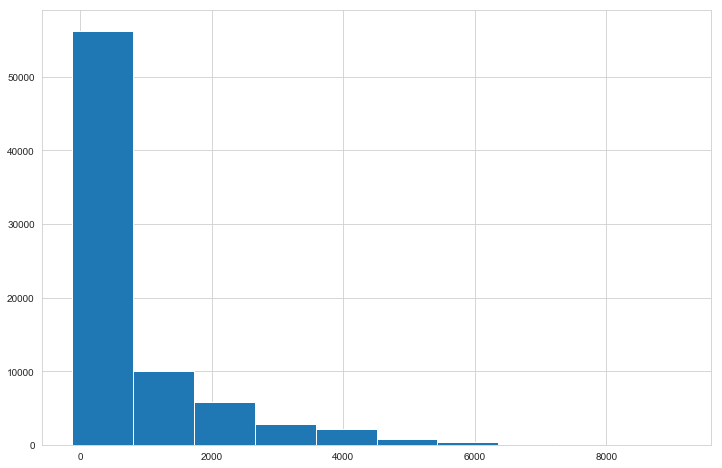

In [87]:
# This trick seems to make a usable datetime object.
(pd.to_datetime(df.exit_datetime) - pd.to_datetime(df.date_of_birth)).dt.days.hist(figsize=(12, 8))

In [88]:
# This converts relevant datetime entries into datetime format and creates a timedelta for age_upon_outcome
df['age_upon_outcome'] = pd.to_datetime(df.exit_datetime) - pd.to_datetime(df.date_of_birth)
df['date_of_birth'] = pd.to_datetime(df.date_of_birth)
df['exit_datetime'] = pd.to_datetime(df.exit_datetime)
df.head()

,age_upon_outcome,animal_id,breed,color,date_of_birth,exit_datetime,name,outcome_subtype,sex_upon_outcome,binary_outcome,animal_dog,animal_cat,animal_other
0,15 days 16:04:00,A684346,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,NaN,Partner,Intact Male,False,False,True,False
1,366 days 11:47:00,A666430,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,Lucy,Partner,Spayed Female,False,True,False,False
2,429 days 14:20:00,A675708,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,*Johnny,NaN,Neutered Male,True,True,False,False
3,3300 days 15:50:00,A680386,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,Monday,Partner,Neutered Male,False,True,False,False
4,181 days 14:04:00,A683115,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,NaN,Rabies Risk,Unknown,False,False,False,True


In [93]:
# Binary given_name feature
df.name.notna().value_counts()

True     54370
False    23886
Name: name, dtype: int64

In [91]:
# Spayed or neutered feature
df.sex_upon_outcome.value_counts()

Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
Name: sex_upon_outcome, dtype: int64

In [120]:
# Creating features for fixed, male, and female animals
fixed = df.sex_upon_outcome.str.contains(r'\bNeutered\b|\bSpayed\b', regex=True)
male = df.sex_upon_outcome.str.contains(r'\bMale\b', regex=True)
female = df.sex_upon_outcome.str.contains(r'\bFemale\b', regex=True)

df[female == male]['sex_upon_outcome'].value_counts()

False    71681
True      6575
Name: sex_upon_outcome, dtype: int64

In [124]:
df['gender_binary'] = female
df['fixed_binary'] = fixed

Unknown    6575
Name: sex_upon_outcome, dtype: int64

In [143]:
# Colors?
len(df.color.value_counts())

525

In [130]:
df.color.str.contains(r'\borange\b|\bblack\b|\bblue\b|\bbrown\b|\bwhite\b|\btan\b|\bcalico\b|\bred\b', regex=True, case=False).value_counts()

True     68839
False     9417
Name: color, dtype: int64

In [132]:
df[df.color.str.contains(r'\borange\b|\bblack\b|\bblue\b|\bbrown\b|\bwhite\b|\btan\b|\bcalico\b|\bred\b',
                      regex=True, case=False) == False]['color'].value_counts()

Tricolor                   1982
Tortie                     1340
Torbie                      845
Yellow                      510
Cream Tabby                 498
Gray                        489
Sable                       476
Lynx Point                  439
Cream                       436
Chocolate                   413
Buff                        386
Seal Point                  324
Flame Point                 200
Fawn                        179
Gray Tabby                  132
Gold                        119
Lilac Point                  79
Tortie Point                 75
Silver Tabby                 63
Apricot                      55
Chocolate Point              51
Silver                       37
Pink                         30
Yellow Brindle               29
Green                        20
Gray/Pink                    18
Gray/Gray                    15
Silver Lynx Point            12
Agouti                       12
Green/Yellow                  8
                           ... 
Chocolat

In [146]:
colors = pd.Series(df.color.str.split('/| '))

In [149]:
colors.str.contains(r'white', regex=True, case=False)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
78226   NaN
78227   NaN
78228   NaN
78229   NaN
78230   NaN
78231   NaN
78232   NaN
78233   NaN
78234   NaN
78235   NaN
78236   NaN
78237   NaN
78238   NaN
78239   NaN
78240   NaN
78241   NaN
78242   NaN
78243   NaN
78244   NaN
78245   NaN
78246   NaN
78247   NaN
78248   NaN
78249   NaN
78250   NaN
78251   NaN
78252   NaN
78253   NaN
78254   NaN
78255   NaN
Name: color, Length: 78256, dtype: float64